In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!unzip -q "/content/drive/My Drive/DL proj/3GroupsData.zip" -d "/content/"


replace /content/3GroupsData/Hyderabad_1-1tile_0-11000.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
import cv2
import time
import numpy as np 
import os
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras
import glob
import matplotlib.pyplot as plt
from keras import backend as K
import keras
import matplotlib.pyplot as plt
import glob
from keras.preprocessing import image

Using TensorFlow backend.


In [ ]:
import tensorflow_addons as tfa

In [ ]:
from keras.layers.normalization import BatchNormalization

In [ ]:
def unet(pretrained_weights = None,input_size = (256,256,3)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    batch4=BatchNormalization()(conv4)
    drop4 = Dropout(0.5)(batch4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)
    pool5 = MaxPooling2D(pool_size=(2, 2))(drop5)
    
    F1=Flatten()(pool5)
    d1=Dense(1024,activation='relu')(F1)    
    d1_2=Dense(512,activation='relu')(d1)

    d2=BatchNormalization()(d1_2)
    
    d2_1=Dense(256,activation='relu')(d2)
    d2_1=Dense(64,activation='relu')(d2_1)
    d2_1=Dense(1,activation='sigmoid')(d2_1)
    
    d2_2=Dense(256,activation='relu')(d2)
    d2_2=Dense(64,activation='relu')(d2_2)
    d2_2=Dense(1,activation='sigmoid')(d2_2)
    
    
    d2_3=Dense(256,activation='relu')(d2)
    d2_3=Dense(64,activation='relu')(d2_3)
    d2_3=Dense(1,activation='sigmoid')(d2_3)
    
    d2_4=Dense(256,activation='relu')(d2)
    d2_4=Dense(64,activation='relu')(d2_4)
    d2_4=Dense(1,activation='sigmoid')(d2_4)
    
    d2_5=Dense(256,activation='relu')(d2)
    d2_5=Dense(64,activation='relu')(d2_5)
    d2_5=Dense(1,activation='sigmoid')(d2_5)
    
    d2_6=Dense(256,activation='relu')(d2)
    d2_6=Dense(64,activation='relu')(d2_6)
    d2_6=Dense(1,activation='sigmoid')(d2_6)
    
    d2_7=Dense(256,activation='relu')(d2)
    d2_7=Dense(64,activation='relu')(d2_7)
    d2_7=Dense(1,activation='sigmoid')(d2_7)
    
    d2_8=Dense(256,activation='relu')(d2)
    d2_8=Dense(64,activation='relu')(d2_8)
    d2_8=Dense(1,activation='sigmoid')(d2_8)
    
    d2_9=Dense(256,activation='relu')(d2)
    d2_9=Dense(64,activation='relu')(d2_9)
    d2_9=Dense(1,activation='sigmoid')(d2_9)
    
    d2_10=Dense(256,activation='relu')(d2)
    d2_10=Dense(64,activation='relu')(d2_10)
    d2_10=Dense(1,activation='sigmoid')(d2_10)
    
    d2_11=Dense(256,activation='relu')(d2)
    d2_11=Dense(64,activation='relu')(d2_11)
    d2_11=Dense(1,activation='sigmoid')(d2_11)
    
    d2_12=Dense(256,activation='relu')(d2)
    d2_12=Dense(64,activation='relu')(d2_12)
    d2_12=Dense(1,activation='sigmoid')(d2_12)
    
    model = Model(input = inputs, output = [d2_1,d2_2,d2_3,d2_4,d2_5,d2_6,d2_7,d2_8,d2_9,d2_10,d2_11,d2_12])
    
    # model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy',metrics=['accuracy'])

    model.compile(optimizer = Adam(lr = 1e-4), loss= tfa.losses.focal_loss.SigmoidFocalCrossEntropy(),metrics=['accuracy'])
    
    
    if(pretrained_weights):
        model.load_weights(pretrained_weights)
        
    return model

In [ ]:
model=unet()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:79: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=[<tf.Tenso...)`


In [ ]:
import glob
    

In [ ]:
import pandas as pd  

data = pd.read_csv('/content/drive/My Drive/DL proj/AllLabels.csv')

In [ ]:
train_x,train_y =[],[]
# rows["Peshawar_1-1tile_11000-10200.png"]
for filename in glob.glob('/content/3GroupsData' + '/*.png' ):
    im=plt.imread(filename)
    filenameExact = filename.split('/')[-1].replace('.tif','.png')
    if len(data.loc[data["content"] == filenameExact].values) is not 0:
        #train_y.append(rows[filename.split('\\')[-1]])

        train_y.append(data.loc[data["content"] == filenameExact].values[0][1:])
        train_x.append(im)
    #train_y.append(rows[filename.split('\\')[-1]])
    #print(filename)

In [ ]:
len(train_x)

4678

In [ ]:
train_y

In [ ]:
# train_y = [[0,0,1,1,0,0,1,0,0,1,1,1],
# [0,1,0,0,1,1,0,0,1,1,0,1]]

In [ ]:
validation_x = train_x[:800] 
validation_y = train_y[:800]
train_x = train_x[800:] 
train_y = train_y[800:]

In [ ]:
train_x= np.array(train_x)
train_y =list(map(list, zip(*train_y)))

validation_x= np.array(validation_x)
validation_y =list(map(list, zip(*validation_y)))

In [ ]:
len(validation_y)

In [ ]:
list(map(list, zip(*validation_y)))[0]

[1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1]

In [ ]:
model.fit(train_x,train_y,validation_data=(validation_x,validation_y),epochs=8, batch_size=32, verbose=1)


Train on 3878 samples, validate on 800 samples
Epoch 1/8
3878/3878 [==============================] - 91s 24ms/step - loss: 0.7166 - dense_5_loss: 0.0540 - dense_8_loss: 0.0569 - dense_11_loss: 0.0522 - dense_14_loss: 0.0667 - dense_17_loss: 0.0704 - dense_20_loss: 0.0375 - dense_23_loss: 0.0704 - dense_26_loss: 0.0609 - dense_29_loss: 0.0698 - dense_32_loss: 0.0561 - dense_35_loss: 0.0547 - dense_38_loss: 0.0671 - dense_5_accuracy: 0.8056 - dense_8_accuracy: 0.6919 - dense_11_accuracy: 0.7653 - dense_14_accuracy: 0.6723 - dense_17_accuracy: 0.4982 - dense_20_accuracy: 0.8752 - dense_23_accuracy: 0.5812 - dense_26_accuracy: 0.7839 - dense_29_accuracy: 0.5542 - dense_32_accuracy: 0.6952 - dense_35_accuracy: 0.7744 - dense_38_accuracy: 0.6024 - val_loss: 0.8505 - val_dense_5_loss: 0.0495 - val_dense_8_loss: 0.1084 - val_dense_11_loss: 0.0826 - val_dense_14_loss: 0.0625 - val_dense_17_loss: 0.0872 - val_dense_20_loss: 0.0351 - val_dense_23_loss: 0.0909 - val_dense_26_loss: 0.0766 - val_de

In [ ]:
len(train_x[1:20])

19

In [ ]:
labels = model.predict(validation_x)

In [ ]:
preducted_y = []

for row in np.array(labels).T[0]:
  building_density_labels = row[:3]
  regular_labels = row[3:5]
  grenary_labels = row[5:8]

  max_building_desnsity = max(building_density_labels)
  max_regular = max(regular_labels)
  max_grenary = max(grenary_labels)

  building_index = 0
  regular_index = 0
  greenary_index = 0

  for index in range(len(building_density_labels)):
    if(building_density_labels[index] == max_building_desnsity):
      print(building_density_labels[index],index)
      building_index = index

  for index in range(len(regular_labels)):
    if(regular_labels[index] == max_regular):
      print(regular_labels[index],index+3)
      regular_index = index+3

  for index in range(len(grenary_labels)):
    if(grenary_labels[index] == max_grenary):
      print(grenary_labels[index],index+5)
      greenary_index = index+5

  list = [0,0,0,0,0,0,0,0,0,0,0,0]

  list[building_index] = 1
  list[regular_index] = 1
  list[greenary_index] = 1
  list[8] = 1 if row[8] >= .5 else 0
  list[9] = 1 if row[9] >= .5 else 0
  list[10] = 1 if row[10] >= .5 else 0
  list[11] = 1 if row[11] >= .5 else 0

  preducted_y.append(list)

0.4748573 2
0.60769534 4
0.49530768 7
0.9104272 2
0.42717326 4
0.31662467 5
0.8190354 2
0.39725748 4
0.3330056 5
0.50742424 0
0.6495518 4
0.49882558 7
0.79012686 2
0.3682331 4
0.33613208 5
0.4874471 0
0.6441832 4
0.5070707 7
0.42627147 0
0.60736084 4
0.41142234 7
0.8985505 2
0.4437014 4
0.29550946 5
0.511727 0
0.64811987 4
0.5304278 7
0.48451182 2
0.5888458 4
0.41935244 7
0.6673764 2
0.58591765 4
0.34511045 7
0.74707836 2
0.463929 4
0.55193865 5
0.5927934 2
0.5407666 4
0.30986607 7
0.5599578 2
0.5080949 4
0.32717305 7
0.8573522 2
0.48297432 4
0.32206428 6
0.53317183 2
0.5903068 4
0.41721243 7
0.46489725 2
0.58117664 4
0.458029 7
0.40506798 2
0.59572935 4
0.3732003 7
0.5076963 2
0.5652531 4
0.43560076 7
0.7785739 2
0.43997526 4
0.36387518 5
0.8990458 2
0.4929382 4
0.38060263 7
0.42411354 2
0.59425867 4
0.3883891 7
0.5690421 2
0.58975613 4
0.37018132 6
0.6118677 2
0.57873094 4
0.37722978 7
0.3861528 2
0.5652977 4
0.385889 7
0.5016142 0
0.5738469 4
0.4318912 7
0.406376 2
0.5923538 4
0.392

In [ ]:
import sklearn.metrics as skm
import numpy as np

In [ ]:
cm = skm.multilabel_confusion_matrix(np.array(validation_y).T, preducted_y,labels=[0,1,2,3,4,5,6,7,8,9,10,11])
print(cm)

[[[612  44]
  [ 68  76]]

 [[548   0]
  [252   0]]

 [[102 299]
  [ 18 381]]

 [[538   0]
  [261   1]]

 [[  1 273]
  [  0 526]]

 [[618  82]
  [ 48  52]]

 [[397  55]
  [301  47]]

 [[223 401]
  [ 13 163]]

 [[263   6]
  [481  50]]

 [[130  20]
  [375 275]]

 [[642   0]
  [158   0]]

 [[166  32]
  [196 406]]]


In [ ]:
print(skm.classification_report(np.array(validation_y).T,preducted_y))

              precision    recall  f1-score   support

           0       0.63      0.53      0.58       144
           1       0.00      0.00      0.00       252
           2       0.56      0.95      0.71       399
           3       1.00      0.00      0.01       262
           4       0.66      1.00      0.79       526
           5       0.39      0.52      0.44       100
           6       0.46      0.14      0.21       348
           7       0.29      0.93      0.44       176
           8       0.89      0.09      0.17       531
           9       0.93      0.42      0.58       650
          10       0.00      0.00      0.00       158
          11       0.93      0.67      0.78       602

   micro avg       0.62      0.48      0.54      4148
   macro avg       0.56      0.44      0.39      4148
weighted avg       0.68      0.48      0.46      4148
 samples avg       0.62      0.50      0.54      4148



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
fields = ['High Building Density (>80%)', 'Moderate Building Density (50%-80%)' , 'Low Building Density(<50%)' , 'Regular Layout', 'Irregular Layout', 'Dense Greenery(>50%)', 'Sparse Greenery (10-50%)', 'Very Sparse Greenery(<5%)', 'Grass', 'Trees', 'Large Buildings', 'Exposed Soil']  

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


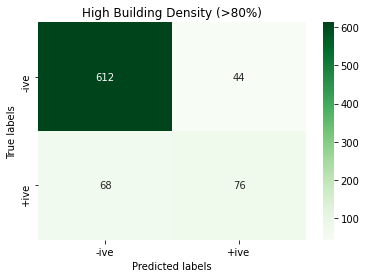

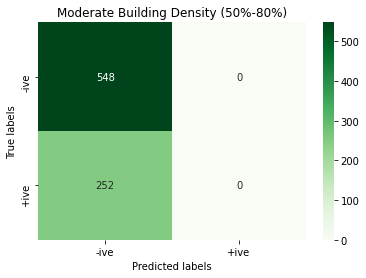

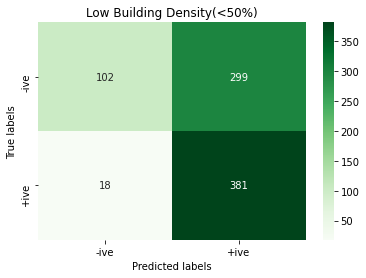

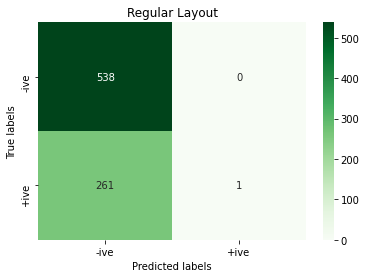

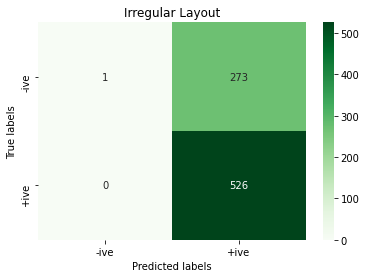

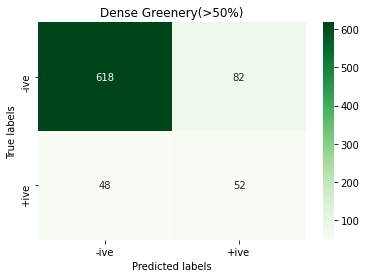

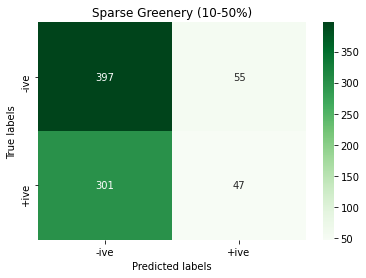

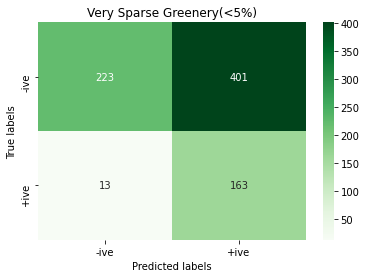

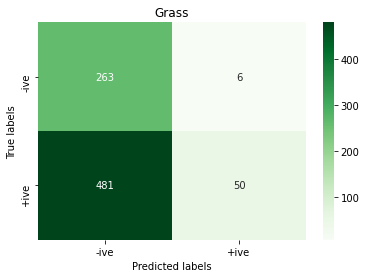

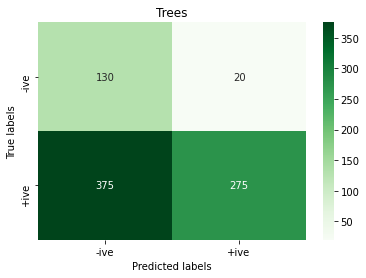

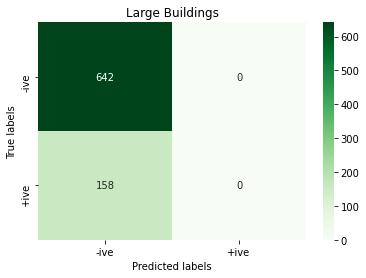

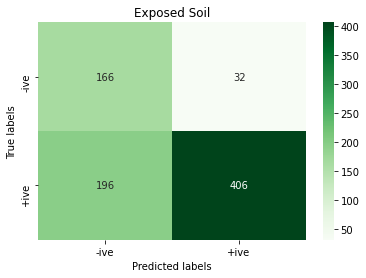

In [ ]:
def printConfusion_Matrix(c , classes_info , title):
  plt.pause(0.01)
  plt.figure()
  ax= plt.subplot()
  sns_plot = sns.heatmap(c, annot=True, ax = ax  ,cmap='Greens' ,fmt='g');

  # labels, title and ticks
  ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
  ax.set_title(title); 
  ax.xaxis.set_ticklabels(classes_info); ax.yaxis.set_ticklabels(classes_info);
  sns_plot.get_figure().savefig(title+".png")



printConfusion_Matrix(cm[0],['-ive','+ive'] , fields[0])
printConfusion_Matrix(cm[1],['-ive','+ive'] , fields[1])
printConfusion_Matrix(cm[2],['-ive','+ive'] , fields[2])
printConfusion_Matrix(cm[3],['-ive','+ive'] , fields[3])
printConfusion_Matrix(cm[4],['-ive','+ive'] , fields[4])
printConfusion_Matrix(cm[5],['-ive','+ive'] , fields[5])
printConfusion_Matrix(cm[6],['-ive','+ive'] , fields[6])
printConfusion_Matrix(cm[7],['-ive','+ive'] , fields[7])
printConfusion_Matrix(cm[8],['-ive','+ive'] , fields[8])
printConfusion_Matrix(cm[9],['-ive','+ive'] , fields[9])
printConfusion_Matrix(cm[10],['-ive','+ive'] , fields[10])
printConfusion_Matrix(cm[11],['-ive','+ive'] , fields[11])

In [ ]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_31 (Conv2D)              (None, 256, 256, 64) 1792        input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_32 (Conv2D)              (None, 256, 256, 64) 36928       conv2d_31[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_16 (MaxPooling2D) (None, 128, 128, 64) 0           conv2d_32[0][0]                  
____________________________________________________________________________________________

In [ ]:
model.save("/content/drive/My Drive/DL proj/focalLossModel.h5")

In [ ]:
results  = model.evaluate(validation_x,validation_y,batch_size=32,verbose=0)

In [ ]:
# New Section
sum(results[-12:])/len(results[-12:])

0.758500004808108

In [ ]:
img_pred= image.load_img("/content/2GroupsData/Peshawar_1-1tile_0-11000.png",target_size=(256,256))
img_pred= image.img_to_array(img_pred)
img_pred= np.expand_dims(img_pred,axis=0)
model.predict(img_pred)

[array([[0.]], dtype=float32),
 array([[1.7956413e-36]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[0.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[0.]], dtype=float32),
 array([[0.9982382]], dtype=float32),
 array([[0.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.8678796e-33]], dtype=float32),
 array([[1.]], dtype=float32)]

In [ ]:
img_pred= image.load_img("/content/2GroupsData/imageNo_1617.png",target_size=(256,256))
img_pred= image.img_to_array(img_pred)
img_pred= np.expand_dims(img_pred,axis=0)
model.predict(img_pred)

[array([[1.]], dtype=float32),
 array([[7.6461017e-28]], dtype=float32),
 array([[0.]], dtype=float32),
 array([[0.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[0.]], dtype=float32),
 array([[1.0397109e-33]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[3.2209335e-09]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[6.578986e-30]], dtype=float32),
 array([[2.583601e-23]], dtype=float32)]

In [ ]:
model.get_weights()

In [ ]:
new_model = load_model("/content/drive/My Drive/e32GData.h5")

In [ ]:
response = new_model.fit(train_x,train_y,validation_data=(validation_x,validation_y),epochs=1, batch_size=32, verbose=1)


Train on 2701 samples, validate on 500 samples
Epoch 1/1
2701/2701 [==============================] - 5982s 2s/step - loss: 5.0136 - dense_5_loss: 0.2885 - dense_8_loss: 0.5311 - dense_11_loss: 0.4012 - dense_14_loss: 0.4887 - dense_17_loss: 0.5097 - dense_20_loss: 0.2223 - dense_23_loss: 0.5277 - dense_26_loss: 0.2900 - dense_29_loss: 0.4889 - dense_32_loss: 0.2644 - dense_35_loss: 0.5216 - dense_38_loss: 0.4780 - dense_5_accuracy: 0.8719 - dense_8_accuracy: 0.7238 - dense_11_accuracy: 0.8245 - dense_14_accuracy: 0.7605 - dense_17_accuracy: 0.7427 - dense_20_accuracy: 0.9137 - dense_23_accuracy: 0.7279 - dense_26_accuracy: 0.8808 - dense_29_accuracy: 0.7656 - dense_32_accuracy: 0.9126 - dense_35_accuracy: 0.7453 - dense_38_accuracy: 0.7497 - val_loss: 6.1079 - val_dense_5_loss: 0.3854 - val_dense_8_loss: 0.5964 - val_dense_11_loss: 0.5126 - val_dense_14_loss: 0.5470 - val_dense_17_loss: 0.5583 - val_dense_20_loss: 0.3435 - val_dense_23_loss: 0.5784 - val_dense_26_loss: 0.4202 - val_de

In [ ]:
new_model.save("/content/e32GData_1e.h5")

In [ ]:
#NEW MODEL PHASE 2

In [ ]:
new_model2 = load_model("/content/drive/My Drive/e32GData_1e.h5")

In [ ]:
response2 = new_model2.fit(train_x,train_y,validation_data=(validation_x,validation_y),epochs=1, batch_size=32, verbose=1)


Train on 2701 samples, validate on 500 samples
Epoch 1/1
2701/2701 [==============================] - 5955s 2s/step - loss: 4.8778 - dense_5_loss: 0.2738 - dense_8_loss: 0.5159 - dense_11_loss: 0.3930 - dense_14_loss: 0.4833 - dense_17_loss: 0.5044 - dense_20_loss: 0.2095 - dense_23_loss: 0.4996 - dense_26_loss: 0.2708 - dense_29_loss: 0.4812 - dense_32_loss: 0.2611 - dense_35_loss: 0.5168 - dense_38_loss: 0.4687 - dense_5_accuracy: 0.8800 - dense_8_accuracy: 0.7320 - dense_11_accuracy: 0.8197 - dense_14_accuracy: 0.7705 - dense_17_accuracy: 0.7516 - dense_20_accuracy: 0.9211 - dense_23_accuracy: 0.7527 - dense_26_accuracy: 0.8860 - dense_29_accuracy: 0.7690 - dense_32_accuracy: 0.9130 - dense_35_accuracy: 0.7549 - dense_38_accuracy: 0.7579 - val_loss: 5.8247 - val_dense_5_loss: 0.3586 - val_dense_8_loss: 0.5978 - val_dense_11_loss: 0.4900 - val_dense_14_loss: 0.5564 - val_dense_17_loss: 0.5732 - val_dense_20_loss: 0.3192 - val_dense_23_loss: 0.5912 - val_dense_26_loss: 0.3661 - val_de

In [ ]:
new_model2.save("/content/e32GData_1e_1e.h5")

In [ ]:
new_model_all = load_model("/content/drive/My Drive/e32GData_1e_1e.h5")

In [ ]:
response2 = new_model_all.fit(train_x,train_y,validation_data=(validation_x,validation_y),epochs=1, batch_size=32, verbose=1)


Train on 3878 samples, validate on 800 samples
Epoch 1/1
3878/3878 [==============================] - 8573s 2s/step - loss: 5.0010 - dense_5_loss: 0.2240 - dense_8_loss: 0.4442 - dense_11_loss: 0.3367 - dense_14_loss: 0.5401 - dense_17_loss: 0.5539 - dense_20_loss: 0.2605 - dense_23_loss: 0.5400 - dense_26_loss: 0.3084 - dense_29_loss: 0.5189 - dense_32_loss: 0.3810 - dense_35_loss: 0.4686 - dense_38_loss: 0.4258 - dense_5_accuracy: 0.9020 - dense_8_accuracy: 0.7775 - dense_11_accuracy: 0.8584 - dense_14_accuracy: 0.7339 - dense_17_accuracy: 0.7148 - dense_20_accuracy: 0.8889 - dense_23_accuracy: 0.7120 - dense_26_accuracy: 0.8871 - dense_29_accuracy: 0.7367 - dense_32_accuracy: 0.8345 - dense_35_accuracy: 0.7824 - dense_38_accuracy: 0.8020 - val_loss: 5.9974 - val_dense_5_loss: 0.3074 - val_dense_8_loss: 0.5264 - val_dense_11_loss: 0.4443 - val_dense_14_loss: 0.5918 - val_dense_17_loss: 0.6041 - val_dense_20_loss: 0.3457 - val_dense_23_loss: 0.5899 - val_dense_26_loss: 0.4177 - val_de

In [ ]:
new_model_all.save("/content/e32GData_1e_1e_AD1e.h5")

In [ ]:
results = model.evaluate(validation_x,validation_y)
print(results)
print(sum(results[-12:])/len(results[-12:]))

800/800 [==============================] - 4s 6ms/step
[1.7467338609695435, 0.2670135200023651, 0.1825803518295288, 0.309762179851532, 0.075632244348526, 0.13917727768421173, 0.11095365881919861, 0.09509576857089996, 0.09525390714406967, 0.156975656747818, 0.12301097810268402, 0.08907577395439148, 0.10220254212617874, 0.8199999928474426, 0.6850000023841858, 0.4325000047683716, 0.65625, 0.5299999713897705, 0.8762500286102295, 0.5649999976158142, 0.7799999713897705, 0.6825000047683716, 0.23000000417232513, 0.8025000095367432, 0.7049999833106995]
0.647083330899477


In [ ]:
response2 = new_model_all.fit(train_x,train_y,validation_data=(validation_x,validation_y),epochs=1, batch_size=32, verbose=1)


Train on 3878 samples, validate on 800 samples
Epoch 1/1
3878/3878 [==============================] - 8782s 2s/step - loss: 4.8467 - dense_5_loss: 0.2238 - dense_8_loss: 0.4314 - dense_11_loss: 0.3275 - dense_14_loss: 0.5184 - dense_17_loss: 0.5350 - dense_20_loss: 0.2498 - dense_23_loss: 0.5201 - dense_26_loss: 0.2870 - dense_29_loss: 0.5107 - dense_32_loss: 0.3628 - dense_35_loss: 0.4635 - dense_38_loss: 0.4097 - dense_5_accuracy: 0.9036 - dense_8_accuracy: 0.7816 - dense_11_accuracy: 0.8556 - dense_14_accuracy: 0.7450 - dense_17_accuracy: 0.7267 - dense_20_accuracy: 0.8943 - dense_23_accuracy: 0.7357 - dense_26_accuracy: 0.8860 - dense_29_accuracy: 0.7468 - dense_32_accuracy: 0.8476 - dense_35_accuracy: 0.7875 - dense_38_accuracy: 0.8022 - val_loss: 5.5625 - val_dense_5_loss: 0.2640 - val_dense_8_loss: 0.4876 - val_dense_11_loss: 0.3909 - val_dense_14_loss: 0.5865 - val_dense_17_loss: 0.6068 - val_dense_20_loss: 0.3163 - val_dense_23_loss: 0.5735 - val_dense_26_loss: 0.3693 - val_de

In [ ]:
new_model_all.save("/content/e32GData_1e_1e_AD1e_1e.h5")

In [ ]:
response2 = new_model_all.fit(train_x,train_y,validation_data=(validation_x,validation_y),epochs=1, batch_size=32, verbose=1)


Train on 3878 samples, validate on 800 samples
Epoch 1/1
3878/3878 [==============================] - 8764s 2s/step - loss: 4.6255 - dense_5_loss: 0.2080 - dense_8_loss: 0.4051 - dense_11_loss: 0.3024 - dense_14_loss: 0.4928 - dense_17_loss: 0.5134 - dense_20_loss: 0.2363 - dense_23_loss: 0.4998 - dense_26_loss: 0.2786 - dense_29_loss: 0.4907 - dense_32_loss: 0.3514 - dense_35_loss: 0.4529 - dense_38_loss: 0.3947 - dense_5_accuracy: 0.9095 - dense_8_accuracy: 0.7916 - dense_11_accuracy: 0.8664 - dense_14_accuracy: 0.7540 - dense_17_accuracy: 0.7398 - dense_20_accuracy: 0.9023 - dense_23_accuracy: 0.7527 - dense_26_accuracy: 0.8938 - dense_29_accuracy: 0.7705 - dense_32_accuracy: 0.8504 - dense_35_accuracy: 0.7811 - dense_38_accuracy: 0.8159 - val_loss: 5.7262 - val_dense_5_loss: 0.2849 - val_dense_8_loss: 0.5029 - val_dense_11_loss: 0.4357 - val_dense_14_loss: 0.5788 - val_dense_17_loss: 0.5836 - val_dense_20_loss: 0.3670 - val_dense_23_loss: 0.5878 - val_dense_26_loss: 0.3845 - val_de

In [ ]:
new_model_all.save("/content/e32GData_1e_1e_AD1e_1e_1e.h5")

In [ ]:
new_model_all2 = load_model("/content/e32GData_1e_1e_AD1e_1e_1e.h5")

In [ ]:
response2 = new_model_all2.fit(train_x,train_y,validation_data=(validation_x,validation_y),epochs=1, batch_size=32, verbose=1)


Train on 3878 samples, validate on 800 samples
Epoch 1/1
2272/3878 [================>.............] - ETA: 57:18 - loss: 4.4526 - dense_5_loss: 0.1973 - dense_8_loss: 0.3650 - dense_11_loss: 0.2764 - dense_14_loss: 0.4739 - dense_17_loss: 0.4883 - dense_20_loss: 0.2274 - dense_23_loss: 0.4841 - dense_26_loss: 0.2717 - dense_29_loss: 0.4948 - dense_32_loss: 0.3434 - dense_35_loss: 0.4402 - dense_38_loss: 0.3902 - dense_5_accuracy: 0.9142 - dense_8_accuracy: 0.8319 - dense_11_accuracy: 0.8908 - dense_14_accuracy: 0.7742 - dense_17_accuracy: 0.7579 - dense_20_accuracy: 0.8992 - dense_23_accuracy: 0.7575 - dense_26_accuracy: 0.8864 - dense_29_accuracy: 0.7566 - dense_32_accuracy: 0.8442 - dense_35_accuracy: 0.7918 - dense_38_accuracy: 0.8226

KeyboardInterrupt: ignored

In [ ]:
new_model_all2.save("/content/e32GData_1e_1e_AD1e_1e_1e_1e.h5")

In [ ]:
new_model_all2 = load_model("/content/e32GData_1e_1e_AD1e_1e_1e.h5")
results = new_model_all2.evaluate(validation_x,validation_y)
print(results)
print(sum(results[-12:])/len(results[-12:]))

800/800 [==============================] - 447s 559ms/step
[5.7262163162231445, 0.28490516543388367, 0.502893328666687, 0.43569064140319824, 0.5788265466690063, 0.5835719704627991, 0.367043673992157, 0.5877869725227356, 0.3845367431640625, 0.5712087750434875, 0.40008077025413513, 0.5388109087944031, 0.4908607602119446, 0.8849999904632568, 0.7762500047683716, 0.8725000023841858, 0.7300000190734863, 0.7200000286102295, 0.9162499904632568, 0.7024999856948853, 0.856249988079071, 0.7425000071525574, 0.8525000214576721, 0.7887499928474426, 0.8187500238418579]
0.8051041712363561


In [ ]:
sum(results[-12:])/12

0.8051041712363561

In [ ]:
predicted_y = new_model_all2.predict(validation_x)

In [ ]:
results[-12:]


[0.8849999904632568,
 0.7762500047683716,
 0.8725000023841858,
 0.7300000190734863,
 0.7200000286102295,
 0.9162499904632568,
 0.7024999856948853,
 0.856249988079071,
 0.7425000071525574,
 0.8525000214576721,
 0.7887499928474426,
 0.8187500238418579]

In [ ]:
len(validation_y[0])

800

In [ ]:
validation_y_for_measure = np.array(validation_y).T

In [ ]:
def precision(y_true, y_pred):
    i = set(y_true).intersection(y_pred)
    len1 = len(y_pred)
    if len1 == 0:
        return 0
    else:
        return len(i) / len1


def recall(y_true, y_pred):
    i = set(y_true).intersection(y_pred)
    return len(i) / len(y_true)


def f1(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    if p + r == 0:
        return 0
    else:
        return 2 * (p * r) / (p + r)


In [ ]:
predicted_y

[array([[0.02259648],
        [0.08324653],
        [0.03215379],
        [0.10021201],
        [0.5947127 ],
        [0.6009263 ],
        [0.58447266],
        [0.09904659],
        [0.2633654 ],
        [0.3992841 ],
        [0.06241938],
        [0.20632806],
        [0.03565642],
        [0.15215412],
        [0.08846304],
        [0.10828161],
        [0.07404712],
        [0.07850984],
        [0.08495203],
        [0.08633474],
        [0.3698909 ],
        [0.01934755],
        [0.1543634 ],
        [0.12056977],
        [0.54274637],
        [0.23737723],
        [0.23834938],
        [0.1568538 ],
        [0.16877809],
        [0.06197795],
        [0.3420748 ],
        [0.32696316],
        [0.08052829],
        [0.06380615],
        [0.21030086],
        [0.4409518 ],
        [0.13210389],
        [0.03055993],
        [0.09862733],
        [0.04478034],
        [0.23074225],
        [0.41145542],
        [0.5749098 ],
        [0.3495919 ],
        [0.13811174],
        [0

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

labels = np.array(validation_y[0]).T
predictions = np.array(predicted_y[0]).T

cm = confusion_matrix(labels, predictions)
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)

ValueError: ignored

In [ ]:
labels

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,

In [ ]:
new_model_all2.metrics_names

['loss',
 'dense_5_loss',
 'dense_8_loss',
 'dense_11_loss',
 'dense_14_loss',
 'dense_17_loss',
 'dense_20_loss',
 'dense_23_loss',
 'dense_26_loss',
 'dense_29_loss',
 'dense_32_loss',
 'dense_35_loss',
 'dense_38_loss',
 'dense_5_accuracy',
 'dense_8_accuracy',
 'dense_11_accuracy',
 'dense_14_accuracy',
 'dense_17_accuracy',
 'dense_20_accuracy',
 'dense_23_accuracy',
 'dense_26_accuracy',
 'dense_29_accuracy',
 'dense_32_accuracy',
 'dense_35_accuracy',
 'dense_38_accuracy']